## Notes

* Aha: You use padding to make the list the same lenght.

* Trucation paramter = short a big sentence in a small one.

* Return Tensor = convert result in a Tensor Element.

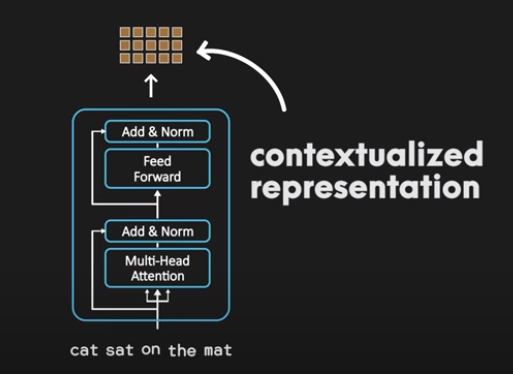

Aha: The model receive text and return a representation.

Bideretional = The model cal look before and after a word.


## Code

In [9]:
%%capture
!pip install  datasets

In [10]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from datasets import load_dataset

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [11]:
model = TFAutoModel.from_pretrained("bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [12]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

* uncased = ther's no difference between low case and upper case
* base = 12 layers


Aha: You can't just feed the model with text, first, you need tokenizer.

In [13]:
inputs = tokenizer(['Hey', 'Are you fine', 'lets do it'], padding=True, return_tensors='tf', truncation=True)

In [14]:
model(inputs)

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(3, 5, 768), dtype=float32, numpy=
array([[[-0.05713576,  0.3380916 , -0.12736951, ..., -0.10031822,
          0.07635899,  0.13996732],
        [ 0.14992768,  0.30957097,  0.08244968, ...,  0.69535255,
          0.26803246, -0.33092225],
        [ 0.797585  , -0.06118929, -0.13006684, ...,  0.2368834 ,
         -0.5502194 , -0.17828219],
        [-0.17561887,  0.3294676 ,  0.5509014 , ..., -0.04171562,
         -0.03016581,  0.25258523],
        [-0.13404603,  0.12223043,  0.3421407 , ...,  0.11038339,
          0.09536804,  0.06533166]],

       [[ 0.11168523,  0.11680333, -0.11747695, ..., -0.22115603,
          0.06149038,  0.19679846],
        [ 0.20193064, -0.66972697, -0.16844997, ..., -0.38462567,
          0.30071843, -0.03316819],
        [-0.0324874 , -1.1220546 ,  0.40720135, ..., -0.03379936,
          0.13185516, -0.1963065 ],
        [ 0.57196265, -0.60563505, -0.3001759 , ..., -0.07327449

In [15]:
from datasets import load_dataset
emotions = load_dataset('SetFit/emotion')

Repo card metadata block was not found. Setting CardData to empty.


In [16]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [48]:
emotions['train'][:100]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too',
  'i feel like i have to make the suffering i m seeing mean something',
  'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
  'i think it s the easiest time of year to feel dissatisfied',
  'i feel low 

In [17]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [18]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [19]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [20]:
# setting 'input_ids', 'attention_mask', 'token_type_ids', and 'label'
# to the tensorflow format. Now if you access this dataset you will get these
# columns in `tf.Tensor` format

emotions_encoded.set_format('tf',
                            columns=['input_ids', 'attention_mask', 'token_type_ids', 'label'])

# setting BATCH_SIZE to 64.
BATCH_SIZE = 64

def order(inp):
    '''
    This function will group all the inputs of BERT
    into a single dictionary and then output it with
    labels.
    '''
    data = list(inp.values())
    return {
        'input_ids': data[1],
        'attention_mask': data[2],
        'token_type_ids': data[3]
    }, data[0]

# converting train split of `emotions_encoded` to tensorflow format
train_dataset = tf.data.Dataset.from_tensor_slices(emotions_encoded['train'][:])
# set batch_size and shuffle
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
# map the `order` function
train_dataset = train_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

# ... doing the same for test set ...
test_dataset = tf.data.Dataset.from_tensor_slices(emotions_encoded['test'][:])
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

In [21]:
inp, out = next(iter(train_dataset)) # a batch from train_dataset
print(inp, '\n\n', out)

{'input_ids': <tf.Tensor: shape=(64, 87), dtype=int64, numpy=
array([[ 101, 1045, 2572, ...,    0,    0,    0],
       [ 101, 1045, 2514, ...,    0,    0,    0],
       [ 101, 1045, 2572, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2001, ...,    0,    0,    0],
       [ 101, 4921, 2063, ...,    0,    0,    0],
       [ 101, 1045, 2514, ...,    0,    0,    0]])>, 'attention_mask': <tf.Tensor: shape=(64, 87), dtype=int64, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'token_type_ids': <tf.Tensor: shape=(64, 87), dtype=int64, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>} 

 tf.Tensor(
[1 2 1 0 1 1 3 4 0 2 0 0 3 0 1 2 1 2 4 1 1 0 1 1 1 2 3 1 0 1 1 

In [22]:
class BERTForClassification(tf.keras.Model):

    def __init__(self, bert_model, num_classes):
        super().__init__()
        self.bert = bert_model
        self.fc = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.bert(inputs)[1]
        return self.fc(x)

In [23]:
classifier = BERTForClassification(model, num_classes=6)

classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [24]:
history = classifier.fit(
    train_dataset,
    epochs=3
)

Epoch 1/3
250/250 [==============================] - 321s 1s/step - loss: 1.2189 - accuracy: 0.5240
Epoch 2/3
250/250 [==============================] - 276s 1s/step - loss: 0.5262 - accuracy: 0.8169
Epoch 3/3
250/250 [==============================] - 275s 1s/step - loss: 0.2000 - accuracy: 0.9229


In [34]:
classifier.evaluate(test_dataset)

32/32 [==============================] - 15s 296ms/step - loss: 0.1741 - accuracy: 0.9275


[0.1740913838148117, 0.9275000095367432]

In [52]:
input_text = "AUSHAUSHAUISHAS"
input_tokens = tokenizer(input_text, padding=True, truncation=True)

input_ids = input_tokens['input_ids']
attention_mask = input_tokens['attention_mask']
token_type_ids = input_tokens['token_type_ids']

input_ids = tf.convert_to_tensor([input_ids])
attention_mask = tf.convert_to_tensor([attention_mask])
token_type_ids = tf.convert_to_tensor([token_type_ids])

predictions = classifier.predict([input_ids, attention_mask, token_type_ids])

predicted_class = np.argmax(predictions, axis=-1)[0] # Assuming you have a single instance

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 69ms/step
Predicted Class: 3
